# Integrated Project 1

### Project description:
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

##### Studying the general information, changing the data type and dealing with missing values:

In [1]:
!pip install squarify
!pip install plotly==4.13.0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mt
games = pd.read_csv('/datasets/games.csv')
print(games.head())
print(games.tail())
print(games.info())
print(games.describe())
print(games.duplicated().sum())
games.columns = games.columns.str.lower() # replacing the column names (make them lowercase)
print(games[games['name'].isna()])
games = games[~games['name'].isna()]
print()
print(games[games['year_of_release'].isna()].count())
games = games[~games['year_of_release'].isna()]
games['year_of_release'] = games['year_of_release'].astype(int)
print()
print(games.info())

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 13.1 MB 1.8 MB/s eta 0:00:01
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93 

After data examination column names were replaced by lower cases, two missing values at Name and Genre columns been removed, also I remove 269 rows with year_of_release missing values that are 0.016% of all the data and have no effect on further analysis.

In [2]:
print(games.isnull().sum())

print()

print(games['user_score'].value_counts())

print(games['user_score'].apply(type).unique())

games['user_score'] = games['user_score'].replace('tbd', np.nan)

games['user_score'] = games['user_score'].astype(float)

games['critic_score'] = games['critic_score'].astype(float)

games['critic_score'] = games['critic_score'].fillna(games.groupby('genre')['critic_score'].transform('median'))

games['user_score'] = games['user_score'].fillna(games.groupby('genre')['user_score'].transform('median'))

games['rating'] = games['rating'].fillna('Unknown')

print()

print(games['rating'].value_counts())

print(games.info())


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.9       2
0.3       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64
[<class 'str'> <class 'float'>]

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-

Three next columns: 'critic_score', 'user_score' and 'rating' had significant number of missing values that needed treat.
For 'critic_score' and 'user_score' since they are numeric values I changed data types to float and grouped the data by genre (genre column has no missing values) then found the median value of 'critic_score' and 'user_score' that is also most common score for each genre and replace the missing values by it. For rating column since it's not numeric and I can't determine how  to each game rating goes I replaced all NaNs with 'unknown' string value.

##### The total sales calculation (the sum of sales in all regions):

In [3]:
games['total_sales'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales
games

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77          69.5         7.7   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00          74.0         7.8   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00          68.0         7.4   
16711      0.00      0.01      0.00         0.00          75.0         7.4   
16712      0.00      0.00      0.01         0.00          66.0         7.6   
16713      0.01      0.00      0.00         0.00          69.5         7.7   
16714      0.00      0.00      0.01         0.00          70.0         7.5   

        rating  total_sales  
0            E        82.54  
1      Unknown        40.24  
2            E        35.52  
3            E        32.77  
4      Unknown        31.38  
...        ...          ...  
16710  Unknown         0.01  
16711  Unknown         0.01  
16712  Unknown         0.01  
16713  Unknown         0.01  
16714  Unknown         0.01  

[16444 rows x 12 columns]

### Analyze the data


##### Look at how many games were released in different years. Is the data for every period significant?

In [4]:
df = games[['year_of_release', 'name']].groupby('year_of_release').count().sort_values(by='year_of_release').reset_index()
df.sample(5)

year_of_release  name
0              1980     9
10             1990    16
14             1994   121
15             1995   219
31             2011  1136

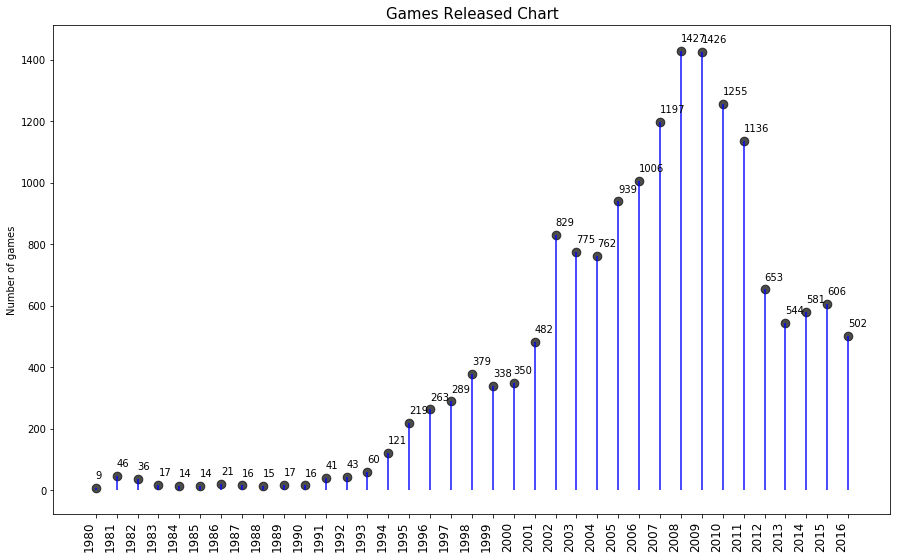

In [5]:
fig,ax = plt.subplots(figsize=(15,9))
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.name, color='blue', alpha=0.7, linewidth=2)
ax.scatter(x=df.year_of_release, y=df.name, s=75, color='black', alpha=0.7)

ax.set_title('Games Released Chart', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release, rotation=90, fontdict={'horizontalalignment': 'right', 'size': 12})

for row in df.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name,2))

The proportion of released games starts being significant from 2002 and best period for gaming starts at 2005 till 2012.


##### Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

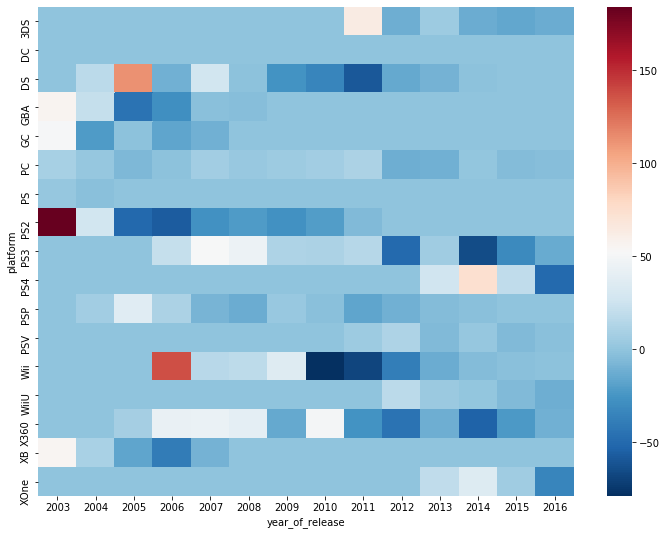

In [6]:
games_new = games[games['year_of_release'] > 2002] # released games starts being significant from 2002
df=games_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)
dynamics=df-df.shift(+1).fillna(0)
plt.figure(figsize=(12,9))
sns.heatmap(dynamics.T, cmap='RdBu_r')

From the heatmap we can see what were the best sales years for every single platform, for example the best year for Wii was 2006 when it released, and the salles were more or less stable till 2010 then sales dramatically declined at 2010 till 2013 the end of Wii prodaction, the Wii was replaced by WiiU wich was released at 2012 but wasn't much popular. The most popular platform was PS2 at 2003 wich popularity came to an end at 2012.

##### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [7]:
df = games[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
df.sample(5)

platform  total_sales
15     SNES       200.04
7        DC        15.95
17      NES       251.05
14       GC       196.73
16      N64       218.01

In [8]:
df['sales_z']=(df['total_sales'] - df['total_sales'].mean())/df['total_sales'].std()
df.tail()

platform  total_sales   sales_z
26       DS       802.78  1.507310
27      Wii       891.18  1.764321
28      PS3       931.34  1.881081
29     X360       961.24  1.968011
30      PS2      1233.56  2.759744

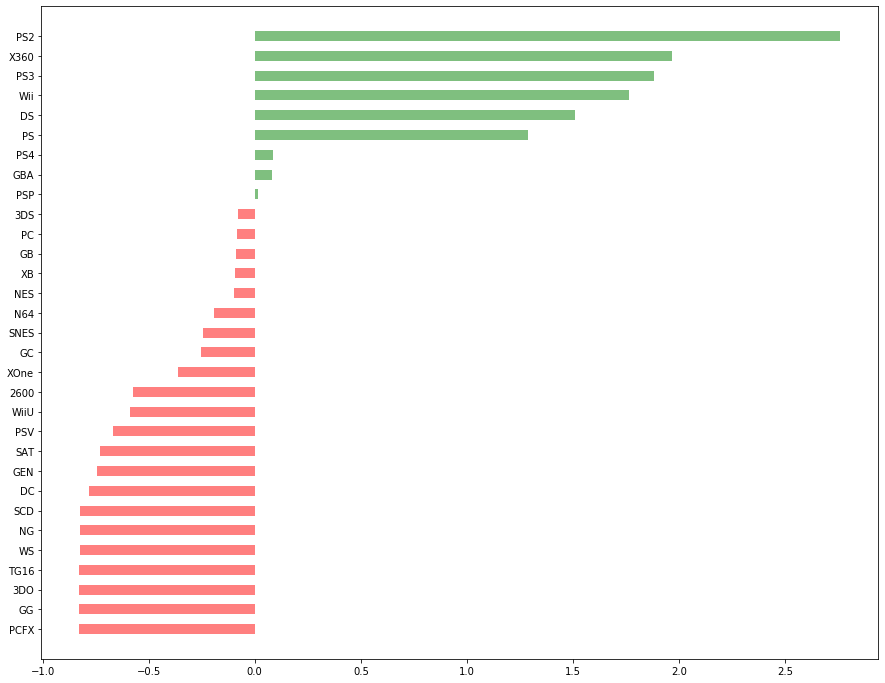

In [9]:
df['colors']=['red' if x<0 else 'green' for x in df['sales_z']]
plt.figure(figsize=(15,12))
plt.hlines(y=df.platform, xmin=0, xmax=df.sales_z, color=df.colors, alpha=0.5, linewidth=10)


PS 2 is an ultimate leader for total sales, much above the average and has the highest z score.

In [10]:
df_tree = games[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
df_tree = df_tree[df_tree['total_sales'] > df_tree['total_sales'].mean()]
df_tree

platform  total_sales
22      PSP       289.53
23      GBA       312.88
24      PS4       314.14
25       PS       727.58
26       DS       802.78
27      Wii       891.18
28      PS3       931.34
29     X360       961.24
30      PS2      1233.56

In [11]:
sizes=df_tree.total_sales.values.tolist()
labels=df_tree.apply(lambda x: str(x[0])+"\n"+"$"+str(round(x[1])), axis=1)
labels                                                     

22     PSP\n$290
23     GBA\n$313
24     PS4\n$314
25      PS\n$728
26      DS\n$803
27     Wii\n$891
28     PS3\n$931
29    X360\n$961
30    PS2\n$1234
dtype: object

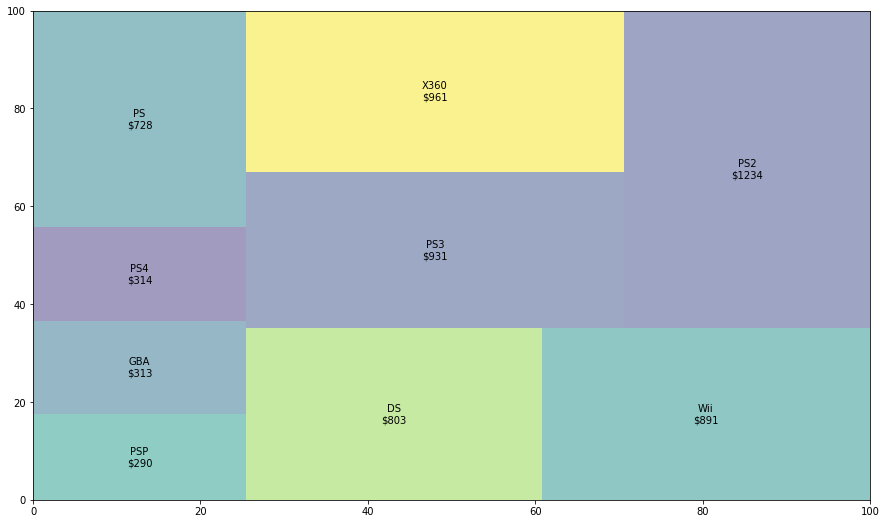

In [12]:
import squarify
plt.figure(figsize=(15,9))
squarify.plot(sizes=sizes, label=labels, alpha=0.5)

I selected platforms to appear on maptree that are above the all platforms average sales, the 5 most profitable platforms     by z score and maptree diagrams are PS2, X360, PS3, Wii, DS till 2016.

In [13]:
games_new = games[games['year_of_release'] > 2002] # released games starts being significant from 2002
df=games_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)
dynamics=round((df/df.shift(+1)-1)*100,3).fillna(0).astype(str)+'%'
print(df.tail())
dynamics.tail()

platform           3DS   DC     DS  GBA   GC     PC   PS  PS2     PS3     PS4  \
year_of_release                                                                 
2012             51.36  0.0  11.01  0.0  0.0  23.22  0.0  0.0  107.36    0.00   
2013             56.57  0.0   1.54  0.0  0.0  12.38  0.0  0.0  113.25   25.99   
2014             43.76  0.0   0.00  0.0  0.0  13.28  0.0  0.0   47.76  100.00   
2015             27.78  0.0   0.00  0.0  0.0   8.52  0.0  0.0   16.82  118.90   
2016             15.14  0.0   0.00  0.0  0.0   5.25  0.0  0.0    3.60   69.25   

platform          PSP    PSV    Wii   WiiU   X360   XB   XOne  
year_of_release                                                
2012             7.69  16.19  21.71  17.56  99.74  0.0   0.00  
2013             3.14  10.59   8.59  21.65  88.58  0.0  18.96  
2014             0.24  11.90   3.75  22.03  34.74  0.0  54.07  
2015             0.12   6.25   1.14  16.35  11.96  0.0  60.14  
2016             0.00   4.25   0.18   4.60   1.5

platform              3DS    DC        DS   GBA    GC        PC    PS  \
year_of_release                                                         
2012             -18.734%  0.0%  -57.945%  0.0%  0.0%  -33.714%  0.0%   
2013              10.144%  0.0%  -86.013%  0.0%  0.0%  -46.684%  0.0%   
2014             -22.645%  0.0%   -100.0%  0.0%  0.0%     7.27%  0.0%   
2015             -36.517%  0.0%      0.0%  0.0%  0.0%  -35.843%  0.0%   
2016               -45.5%  0.0%      0.0%  0.0%  0.0%   -38.38%  0.0%   

platform             PS2       PS3       PS4       PSP       PSV       Wii  \
year_of_release                                                              
2012             -100.0%  -31.522%      0.0%  -56.846%  249.676%  -63.604%   
2013                0.0%    5.486%      inf%  -59.168%  -34.589%  -60.433%   
2014                0.0%  -57.828%  284.763%  -92.357%    12.37%  -56.345%   
2015                0.0%  -64.782%     18.9%    -50.0%  -47.479%    -69.6%   
2016                0.0%  -78.597%  -41.758%   -100.0%    -32.0%  -84.211%   

platform             WiiU      X360    XB      XOne  
year_of_release                                      
2012                 inf%  -30.659%  0.0%      0.0%  
2013              23.292%  -11.189%  0.0%      inf%  
2014               1.755%  -60.781%  0.0%  185.179%  
2015             -25.783%  -65.573%  0.0%   11.226%  
2016             -71.865%  -87.291%  0.0%  -56.518%

As we can see on percentage of sales for each year calculated from year before, there is negative dynamic on market for all platforms, especially for PSP that had been no more produced since 2016. As we can see all platforms are shrinking for at least three past years from 2014 till 2016. As a potentially profitable platform I would select PS4 that released at 2013 and technology advanced, I think her best years is yet to come when the market dynamics will change.

##### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

Text(0.5, 1.0, 'Average sales')

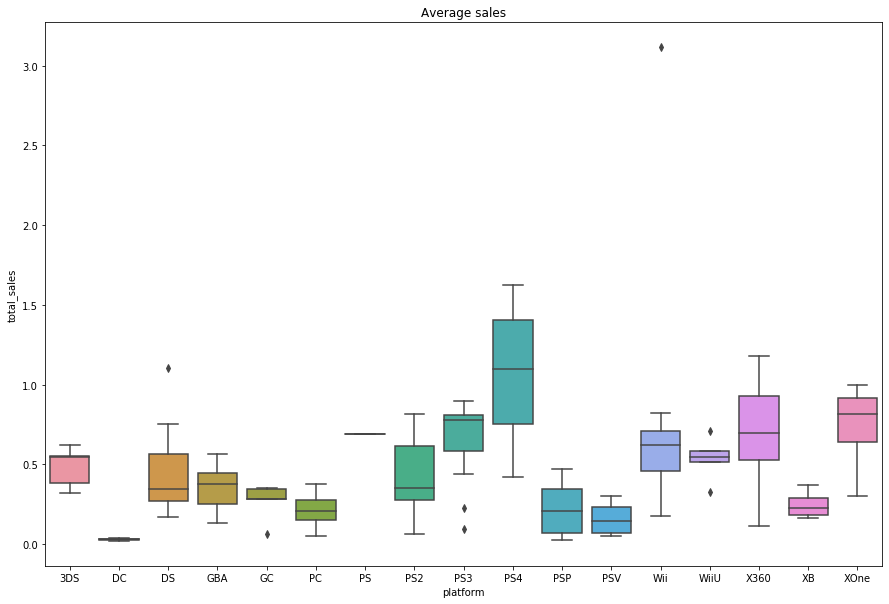

In [14]:
mean = games_new.groupby(['platform', 'year_of_release'])['total_sales'].mean().reset_index()
plt.figure(figsize=(15,10))
sns.boxplot(x='platform', y='total_sales', data=mean)
plt.title('Average sales')

Text(0.5, 1.0, 'Total sales')

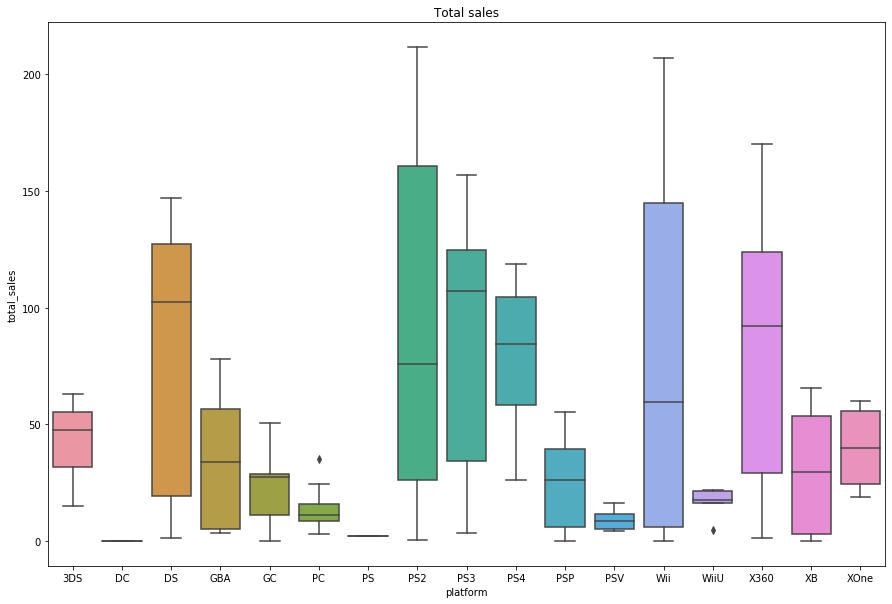

In [15]:
total = games_new.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
plt.figure(figsize=(15,10))
sns.boxplot(x='platform', y='total_sales', data=total)
plt.title('Total sales')

Yes as we see there is significant differences in total sales between platforms,also when we compare the average sales per year and the total sales since platform's released we can see that PS4 platform sold much more on the average with the highest start of sales, what confirms that it's the most promising platform for 2016 on market.  

##### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

              critic_score  user_score  total_sales
critic_score      1.000000    0.486834     0.351474
user_score        0.486834    1.000000    -0.065482
total_sales       0.351474   -0.065482     1.000000


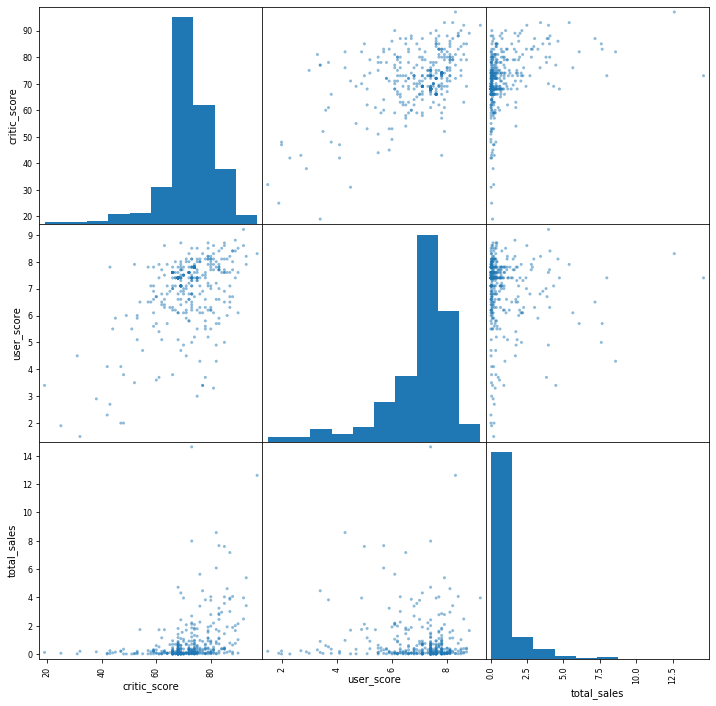

In [16]:
  
df_games = games[games['platform'] == 'PS4']

sales_platform_corr=df_games[['critic_score', 'user_score', 'total_sales']]

pd.plotting.scatter_matrix(sales_platform_corr,  figsize=(12, 12))

print(sales_platform_corr.corr())

As we can see there is no correlation between users reviews (user scors) and total games sales for PS4 that's mean that users opinions on games don't affect the sales at all, and the professional reviews affect just a bit - very weak positive correlation between critic_score and total sales, just 0.35.

##### Keeping your conclusions in mind, compare the sales of the same games on other platforms.


PS2               critic_score  user_score  total_sales
critic_score      1.000000    0.502550     0.350082
user_score        0.502550    1.000000     0.176364
total_sales       0.350082    0.176364     1.000000

X360               critic_score  user_score  total_sales
critic_score      1.000000    0.520208     0.363295
user_score        0.520208    1.000000     0.063764
total_sales       0.363295    0.063764     1.000000

PS3               critic_score  user_score  total_sales
critic_score      1.000000    0.503150     0.405054
user_score        0.503150    1.000000     0.048617
total_sales       0.405054    0.048617     1.000000

Wii               critic_score  user_score  total_sales
critic_score      1.000000    0.480459     0.110674
user_score        0.480459    1.000000     0.063441
total_sales       0.110674    0.063441     1.000000

DS               critic_score  user_score  total_sales
critic_score      1.000000    0.448843     0.137253
user_score        0.448843    1.000000 

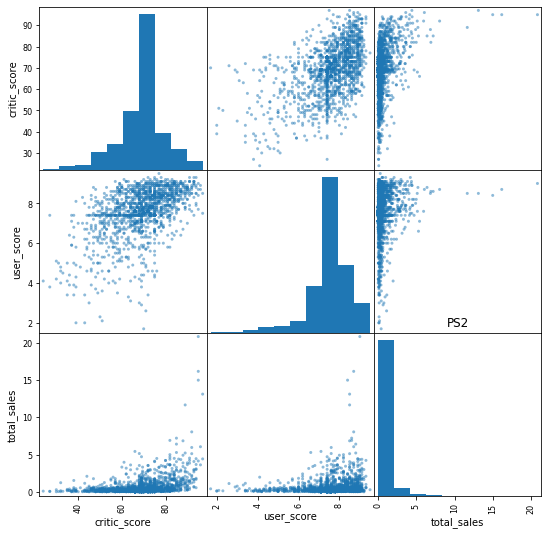

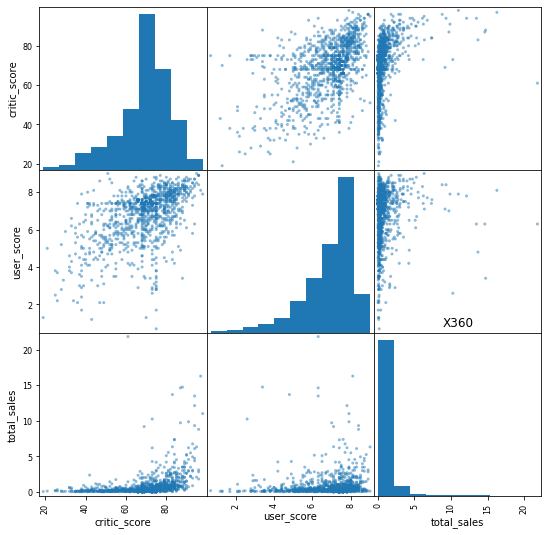

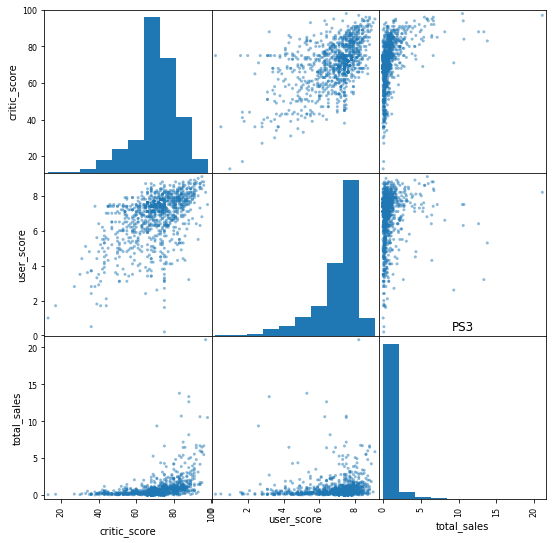

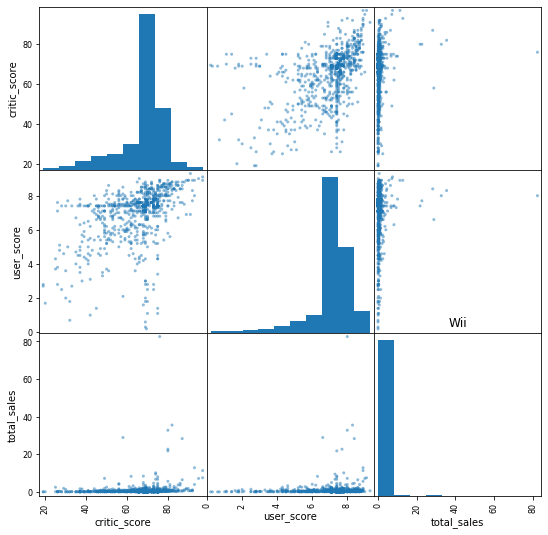

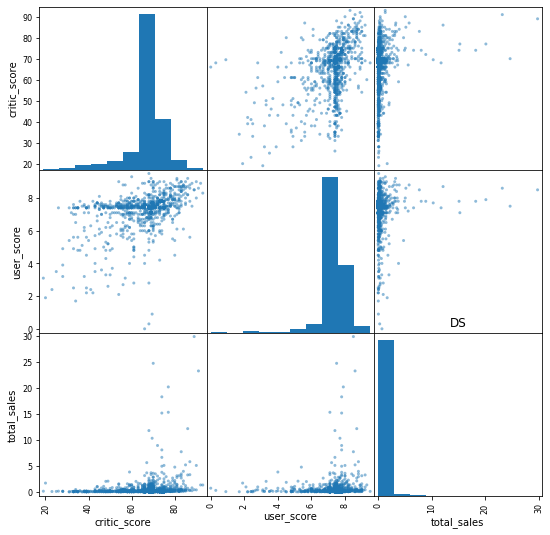

In [17]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

for name in platforms:
    df_games = games[games['platform'] == name]
    sales_platform_corr=df_games[['critic_score', 'user_score', 'total_sales']]
    pd.plotting.scatter_matrix(sales_platform_corr,  figsize=(9, 9))
    plt.title(name)
    print()
    print(name,sales_platform_corr.corr())
    



Same resalts we can see for other top 5 games sale platforms: for all platforms there is no effect of users score on the total games sales - no correlation and very week positive correlation between professional reviews and games sales for PS platforms. For other platforms there is no effect of professional reviews on toal games sales - no correlation. Correlation between critic_score and total_sales only for PS platforms can be explained by PS popularity, PS2 is a leader of total sales till 2016, so I assume that much more people read professional games reviews for PS, but it still has negligible effect on total PS platforms games sales. According this we can conclude that reviews by professionals or by users do not effect sales of video games.

##### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? 

Text(0, 0.5, 'Number of sales')

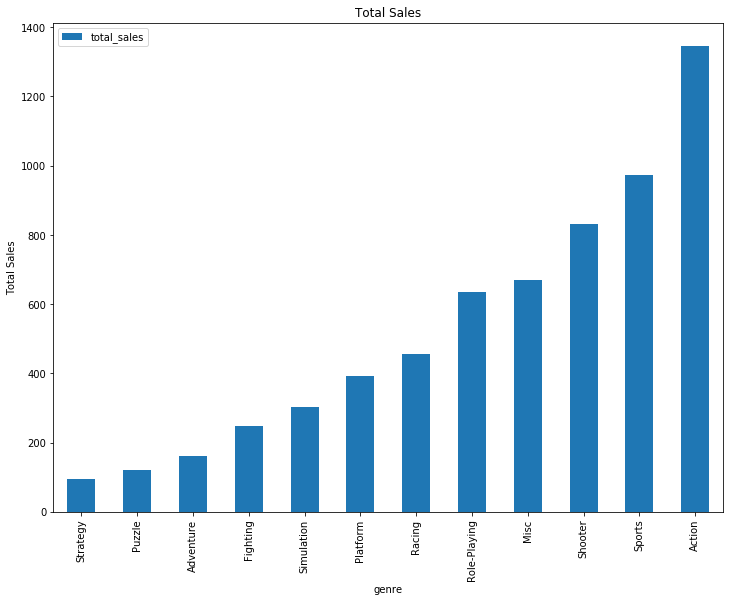

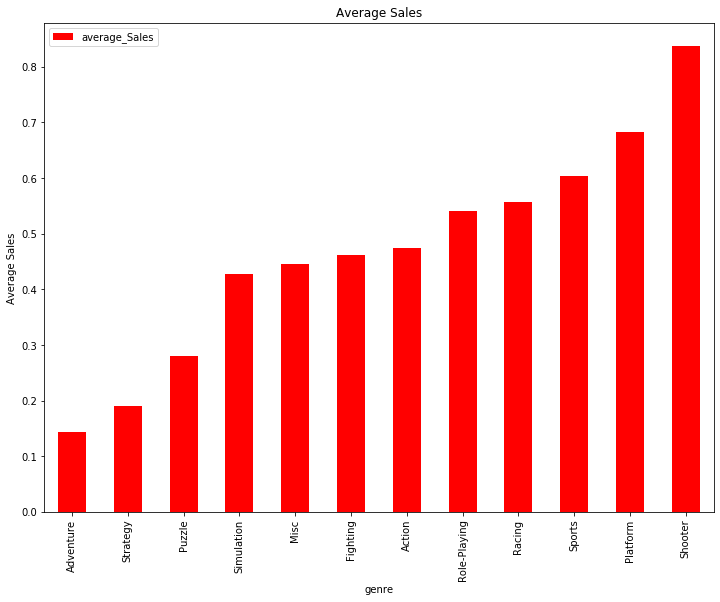

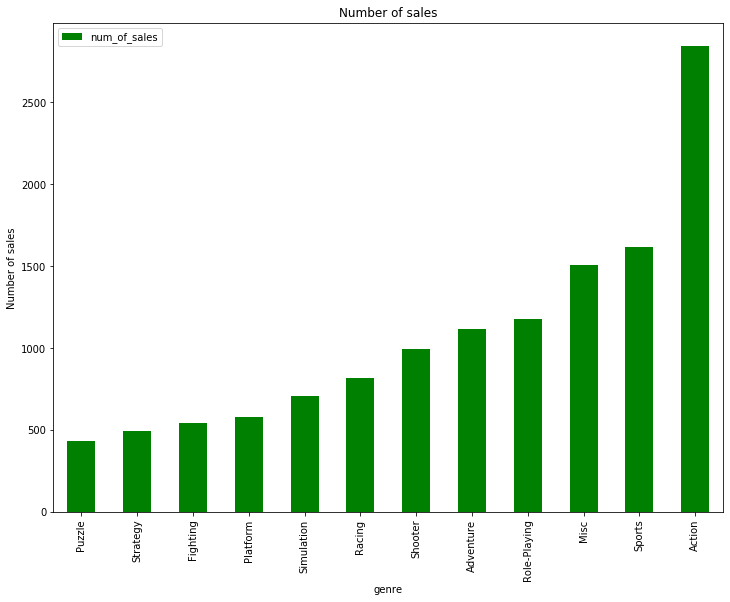

In [18]:
tot_genre = games_new.pivot_table(index='genre', values='total_sales', aggfunc ='sum').sort_values('total_sales')

avg_genre = games_new.pivot_table(index='genre', values='total_sales', aggfunc ='mean').sort_values('total_sales')

avg_genre.rename(columns={'total_sales': 'average_Sales'}, inplace=True)

count_genre = games_new.pivot_table(index='genre', values='total_sales', aggfunc ='count').sort_values('total_sales')

count_genre.rename(columns={'total_sales': 'num_of_sales'}, inplace=True)

tot_genre.plot(kind = 'bar', figsize=(12, 9))
plt.title('Total Sales')
plt.ylabel('Total Sales')
avg_genre.plot(kind = 'bar', figsize=(12, 9), color='red')
plt.ylabel('Average Sales')
plt.title('Average Sales')
count_genre.plot(kind = 'bar', figsize=(12, 9), color='green')
plt.title('Number of sales')
plt.ylabel('Number of sales')

The most profitable genre of total sales is action but if we compare it with average profitable genre it appears to be shooter, although that there were much more games released for action genre, as we can see from the 'Number of sales' bars, on the 'Average Sales' profit bars action genre placed at the middle wich means it's the most popular genre but not the most profitable. We can coclude that if at the same time would be two new games released, one is an action and the other is a shooter the shooter game may be more profitable with higher probability, also we can learn from top average and total bars that people like more active genre video games than thinking.

##### For each region (NA, EU, JP) determine the top five platforms:

In [19]:

region_games = games_new[['platform', 'na_sales', 'eu_sales', 'jp_sales']]

grouped = region_games.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc ='sum')

pd.options.plotting.backend = 'plotly'

fig = grouped.plot.bar(title='Sales by region')

fig.show()

display(grouped.na_sales.sort_values(ascending=False).head(5))
print()
display(grouped.eu_sales.sort_values(ascending=False).head(5))
print()
display(grouped.jp_sales.sort_values(ascending=False).head(5))

platform
X360    595.74
Wii     486.87
PS3     390.13
PS2     380.81
DS      380.31
Name: na_sales, dtype: float64

platform
PS3     327.21
X360    268.32
Wii     258.32
PS2     204.35
DS      188.41
Name: eu_sales, dtype: float64

platform
DS     175.00
3DS    100.62
PS2     89.03
PS3     79.41
PSP     75.88
Name: jp_sales, dtype: float64

There is significant diffirence between Japan region and other, apparently PS which is produced by Japanese company is not so popular at Japan as at Europe and North America. The DS platform wich at the fifth place at Europ and North America is the most popular platform at Japan, also Japanies buy much less video games then other regions. The top three favorites platforms at Europe and North America are the same, Europeans prefer PS3 and North Americans X360. North Americans buy much more video games then other regions, for example the DS platform sold almost twice more at North America then at Japan.  

##### For each region (NA, EU, JP), determine the top five genres:

In [20]:
genre_games = games_new[['genre', 'na_sales', 'eu_sales', 'jp_sales']]

grouped = genre_games.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc ='sum')

fig = grouped.plot.bar(title='Sales by genre')

fig.show()

display(grouped.na_sales.sort_values(ascending=False).head(5))
print()
display(grouped.eu_sales.sort_values(ascending=False).head(5))
print()
display(grouped.jp_sales.sort_values(ascending=False).head(5))

genre
Action          656.86
Sports          502.67
Shooter         447.43
Misc            339.68
Role-Playing    247.21
Name: na_sales, dtype: float64

genre
Action     409.48
Sports     296.43
Shooter    269.37
Misc       183.99
Racing     158.74
Name: eu_sales, dtype: float64

genre
Role-Playing    202.72
Action          117.40
Misc             78.50
Sports           60.93
Platform         44.65
Name: jp_sales, dtype: float64

As we can see Europeans and North Americans have almost same taste, the top free genres are the same: Action, Sports and Shooter when Japanies taste is different, Japans also like Action games but they prefer Role-Playing games, wich is even not at top five genre at Europe, they also prefer music then sport games. 

##### Do ESRB ratings affect sales in individual regions?

In [21]:
rating_games = games_new[['rating', 'na_sales', 'eu_sales', 'jp_sales']]

grouped = rating_games.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc ='sum')

fig = grouped.plot.bar(title='Sales by rating')

fig.show()

I can't say how much the ESRB ratings effects on total games sales but I can tell that the most popular rating at all three regions is E that means games with that rating are suitable for all ages and its make sense since it expose this games to all groups of customers. (I can't tell nothing about 'unknown' rating wich is most popular at Japan because it replacing missing value)

##### Test the following hypotheses:
—Average user ratings of the Xbox One and PC platforms are the same:

In [22]:

Xbox_users = games_new[games_new['platform'] == 'XOne']

PC_users = games_new[games_new['platform'] == 'PC']

alpha = 0.05 # critical statistical significance

levene_results = st.levene(Xbox_users['user_score'], PC_users['user_score'], center='mean')

print('p-value: ', levene_results.pvalue)

if (levene_results.pvalue < alpha):
        print("We reject the null hypothesis, the sample groups do not have equal variance")
else:
        print("We can't reject the null hypothesis, the sample groups have equal variance") 

results = st.ttest_ind(
        Xbox_users['user_score'], 
        PC_users['user_score'],
        )

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 
        

p-value:  0.20443037782558166
We can't reject the null hypothesis, the sample groups have equal variance
p-value:  0.000948054380512975
We reject the null hypothesis


First I used Levene's test to determine if the two sample groups have equal variance, null hypothesis is that the groups have equal variance, according to analysis we can't reject the null hypothesis.Then in order to test the hypothes if the average user ratings of the Xbox One and PC platforms are the same I apply the stats.ttest_ind method, equal_var=True set by default. The null hypothesis is that the average user ratings are equal.
According to analysis we reject that average user ratings from Xbox One and PC platforms are the same.

##### —Average user ratings for the Action and Sports genres are different:

In [23]:
Action = games_new[games_new['genre'] == 'Action']

Sports = games_new[games_new['genre'] == 'Sports']

levene_results = st.levene(Action['user_score'], Sports['user_score'], center='mean')

print('p-value: ', levene_results.pvalue)

if (levene_results.pvalue < alpha):
        print("We reject the null hypothesis, the sample groups do not have equal variance")
else:
        print("We can't reject the null hypothesis, the sample groups have equal variance")

# variance are different 

alpha = 0.05 # critical statistical significance

results = st.ttest_ind(
        Action['user_score'], 
        Sports['user_score'],
        equal_var=False
        )

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  1.845601722030884e-08
We reject the null hypothesis, the sample groups do not have equal variance
p-value:  0.0040013025830397874
We reject the null hypothesis


I used same Levene's test to determine if the two sample groups have equal variance and rejected the null hypothesis by result, then I used st.ttest_ind mothod to test if the average user ratings for the Action and Sports genres are different and set the equal_var=False. 
The null hypothesis is that the average user ratings are equal.
The analysis test showed that we reject the null hypothesis and with 95% probability we can say that average user ratings for the Action and Sports genres are different.

##### General Conclusion:
For last years 2014 - 2016 there is negative video games market dynamic for all platforms although there is promising PS4 platform that released at 2013 and had high start of sales with highest average sales per year.
The most popular and profitable platform till 2016 is PS2.
The user ratings dose not effect on games sales and same for professional reviews except PS platform games which can be explained by platform height popularity, still the reviews effect is very weak and can be neglected.
The most popular genre is action games but shooter games can be more profitable since there yearly average profit is higher.
Japaneses have there own vidoe games popular platform - DS and different games preferred genre 'Role-Playing', also they are the smolest video games market from three tested: Japan, Europe, North America and the bigest market for vidoe games is North American. The average user ratings will be different for Xbox One and PC platforms with 95% probability same for average user ratings for popular genres action and sports.
To plan an advertising campaign I will consitrate on North American market for X360 platform games wich is the most popular platform at North America and games with their favorite genre action or shooter.

Thank you for reading!